In [1]:
import cv2
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
path_template="/content/drive/MyDrive/Colab Notebooks/Vision por computadora 1/template/pattern.png"
path_image1="/content/drive/MyDrive/Colab Notebooks/Vision por computadora 1/Images/coca_retro_1.png"
path_image2="/content/drive/MyDrive/Colab Notebooks/Vision por computadora 1/Images/coca_retro_2.png"
path_image3="/content/drive/MyDrive/Colab Notebooks/Vision por computadora 1/Images/coca_logo_1.png"
path_image4="/content/drive/MyDrive/Colab Notebooks/Vision por computadora 1/Images/coca_logo_2.png"
path_image5="/content/drive/MyDrive/Colab Notebooks/Vision por computadora 1/Images/COCA-COLA-LOGO.jpg"
path_image6="/content/drive/MyDrive/Colab Notebooks/Vision por computadora 1/Images/coca_multi.png"

Mounted at /content/drive


ORB es un algoritmo popular para la detección y descripción de características en imágenes. Combina la detección rápida de características llamada FAST (Features from Accelerated Segment Test) con la descripción binaria llamada BRIEF (Binary Robust Independent Elementary Features). Además, ORB también incorpora algunas mejoras, como la rotación de las características para hacerlas más robustas a las transformaciones geométricas.

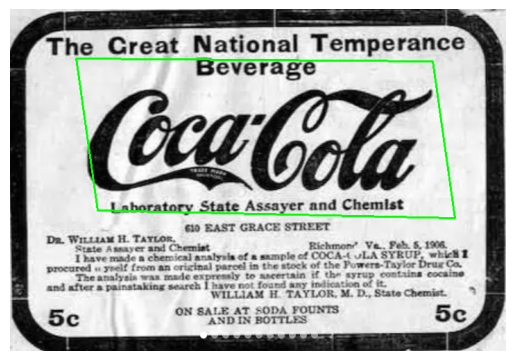

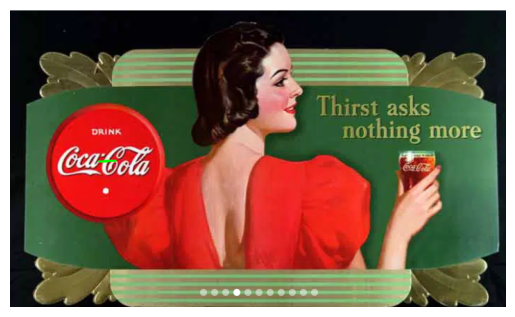

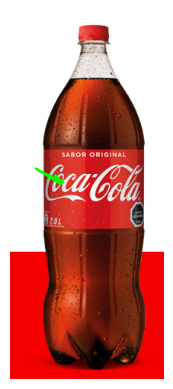

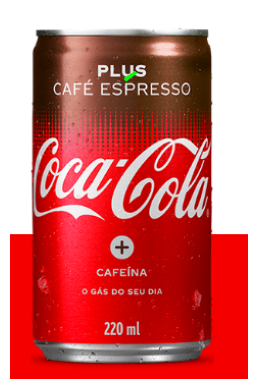

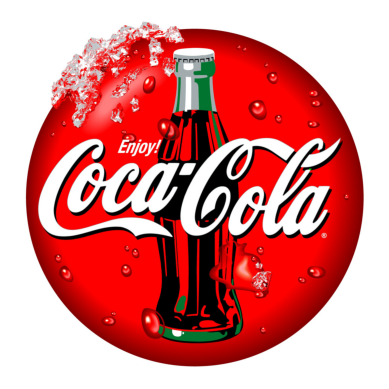

In [2]:
def detectar_coincidencias(template_path, imagenes_paths):
    # Cargar la plantilla
    template = cv2.imread(template_path, 0)

    # Crear el objeto detector de características
    orb = cv2.ORB_create()

    # Encontrar los puntos clave y los descriptores de la plantilla
    kp_template, des_template = orb.detectAndCompute(template, None)

    for imagen_path in imagenes_paths:
        # Cargar la imagen
        imagen = cv2.imread(imagen_path)

        # Convertir la imagen a escala de grises
        imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

        # Encontrar los puntos clave y los descriptores de la imagen
        kp_imagen, des_imagen = orb.detectAndCompute(imagen_gris, None)

        # Realizar la coincidencia de descriptores
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
        coincidencias = bf.match(des_template, des_imagen)
        coincidencias = sorted(coincidencias, key=lambda x: x.distance)

        # Establecer un umbral para la coincidencia
        umbral = 20

        # Obtener los puntos clave correspondientes a las coincidencias
        puntos_template = np.float32([kp_template[m.queryIdx].pt for m in coincidencias]).reshape(-1, 1, 2)
        puntos_imagen = np.float32([kp_imagen[m.trainIdx].pt for m in coincidencias]).reshape(-1, 1, 2)

        # Calcular la matriz de transformación de perspectiva
        M, mask = cv2.findHomography(puntos_template, puntos_imagen, cv2.RANSAC, umbral)

        # Obtener las dimensiones de la plantilla
        h, w = template.shape

        # Definir las esquinas de la plantilla
        esquinas = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)

        # Aplicar la transformación de perspectiva a las esquinas de la plantilla
        esquinas_transformadas = cv2.perspectiveTransform(esquinas, M)

        # Dibujar el contorno del logo en la imagen
        imagen_dibujada = cv2.polylines(imagen, [np.int32(esquinas_transformadas)], True, (0, 255, 0), 2)


        # Mostrar la imagen resultante
        plt.imshow(cv2.cvtColor(imagen_dibujada, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()


# Ruta del template y las imágenes a comparar
template_path = path_template
imagenes_paths = [path_image1, path_image2, path_image3, path_image4,path_image5]

detectar_coincidencias(template_path, imagenes_paths)


para deteccion de multiples objetos

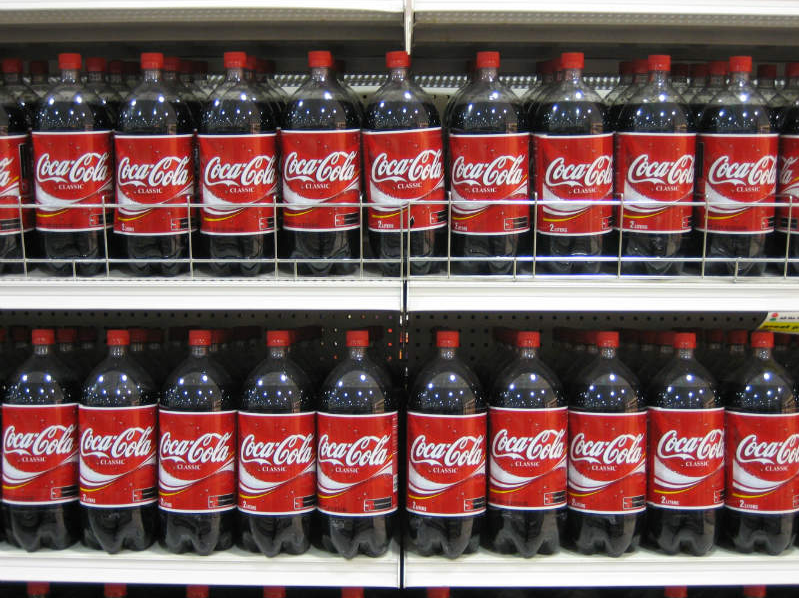

In [ ]:

from google.colab.patches import cv2_imshow

# Cargar la imagen de la plantilla y la imagen de entrada
template = cv2.imread(path_template, 0)

image = cv2.imread(path_image6)
# Convertir de BGR a RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_gray = cv.cvtColor(image_rgb, cv.COLOR_BGR2GRAY)


# Obtener las dimensiones de la plantilla
template_h, template_w = template.shape[:2]

# Realizar la coincidencia de patrones en la imagen
result = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

# Establecer un umbral para la coincidencia
threshold = 0.9


# Encontrar las posiciones donde se supera el umbral
locations = np.where(result >= threshold)

# Iterar sobre las posiciones encontradas y dibujar rectángulos
for pt in zip(*locations[::-1]):
    cv2.rectangle(image, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2)

# Mostrar la imagen con los rectángulos dibujados
cv2_imshow(image)

